<a href="https://colab.research.google.com/github/nitish-01/optimisation/blob/main/Simple_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem description:

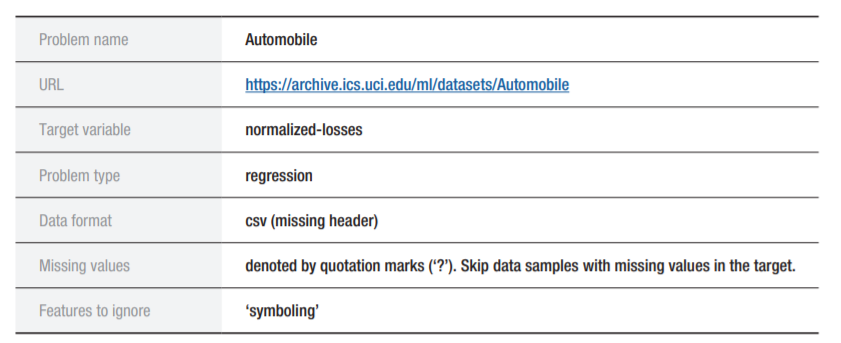

In [2]:
#Data Import, function to ignore feature and missing values

import numpy as np
import pandas as pd
import io
import requests
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
s=requests.get(url).content

features = ['symboling','normalized_losses','make','fuel_type','aspiration',
            'num_of_doors','body_style','drive_wheels','engine_location',
            'wheel_base','length','width','height','curb_weight',
            'engine_type','num_of_cylinders','engine_size','fuel_system',
            'bore','stroke','compression_ratio','horsepower','peak_rpm',
            'city_mpg','highway_mpg','price']

def load_data():
    "" "Returns dataset replaced with null values('?') to np.NaN """
    data=pd.read_csv(io.StringIO(s.decode('utf-8')),names=features)
    data = data.replace('?', np.NaN)
    return data

def apply_specified_condition(data):
    """
    Missing values: denoted by quotation marks (‘?’). Skip data samples with missing values in the target.
    Features to ignore: ‘symboling’
    """
    not_null_inTarget = data[data.normalized_losses.notnull()]
    Imp_feature = not_null_inTarget.drop("symboling", axis=1)
    return Imp_feature


In [3]:
#Exploration of data:
data = apply_specified_condition(load_data())
data.head()


,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
3,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 3 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized_losses  164 non-null    object 
 1   make               164 non-null    object 
 2   fuel_type          164 non-null    object 
 3   aspiration         164 non-null    object 
 4   num_of_doors       163 non-null    object 
 5   body_style         164 non-null    object 
 6   drive_wheels       164 non-null    object 
 7   engine_location    164 non-null    object 
 8   wheel_base         164 non-null    float64
 9   length             164 non-null    float64
 10  width              164 non-null    float64
 11  height             164 non-null    float64
 12  curb_weight        164 non-null    int64  
 13  engine_type        164 non-null    object 
 14  num_of_cylinders   164 non-null    object 
 15  engine_size        164 non-null    int64  
 16  fuel_system        164 non

In [5]:
data.describe()

,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,98.164024,172.238415,65.598780,53.774390,2458.274390,117.957317,10.126951,26.268293,31.847561
std,5.120198,11.417833,1.923028,2.343942,475.087068,30.896294,3.836306,6.193305,6.514349
min,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,7.000000,15.000000,18.000000
25%,94.500000,165.675000,64.000000,52.000000,2090.750000,97.000000,8.700000,22.000000,28.000000
50%,96.550000,172.000000,65.400000,54.100000,2367.500000,109.000000,9.000000,26.000000,32.000000
75%,100.400000,177.800000,66.500000,55.500000,2785.500000,131.750000,9.400000,31.000000,37.000000
max,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,23.000000,49.000000,54.000000


In [6]:
# Null check in dataset apart from target
data[np.any(data[data.columns[2:]].isnull(), axis=1)]

,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
27,148,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
55,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
56,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
57,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
58,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


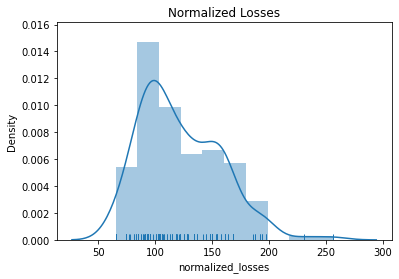

In [7]:
#Kernal density estimation

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_target_feature(data):
    plt.figure()
    sns.distplot(pd.to_numeric(data.normalized_losses), rug=True, kde=True)
    plt.title("Normalized Losses")
    plt.show()

plot_target_feature(data)

In [8]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import pandas as pd
from sklearn.impute import SimpleImputer

num_features = ['num_of_doors', 'wheel_base', 'length', 'width', 'height',
                'curb_weight', 'num_of_cylinders', 'engine_size', 'bore', 'stroke', 'compression_ratio',
                'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cat_features = ['make', 'fuel_type', 'aspiration', 'body_style', 'drive_wheels', 'engine_location',
               'engine_type', 'fuel_system']


class DataFrameSelector(BaseEstimator, TransformerMixin):

    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.loc[:, self.attribute_names].values


class ConvertWordToNum(BaseEstimator, TransformerMixin):

    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.copy()
        mapping_num_of_doors = pd.Series([2, 4], index=['two', 'four'])
        mapping_num_of_cylinders = pd.Series([2, 3, 4, 5, 6, 8, 12], index=['two', 'three', 'four', 'five', 'six',
                                                                            'eight', 'twelve'])
        X.loc[:, 'num_of_doors'] = X.loc[:, 'num_of_doors'].map(mapping_num_of_doors)
        X.loc[:, 'num_of_cylinders'] = X.loc[:, 'num_of_cylinders'].map(mapping_num_of_cylinders)

        return X


class DtypeConverter(BaseEstimator, TransformerMixin):

    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

        for col in X.columns:
            if col in num_features:
                X.loc[:, col] = pd.to_numeric(X.loc[:, col])

        return X


class Categorizer(BaseEstimator, TransformerMixin):

    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.copy()

        for col in X.columns:
            X.loc[:, col] = X.loc[:, col].astype('category')

        return X


num_pipeline = Pipeline([
    ('WordToNum', ConvertWordToNum()),
    ('DtypeCV', DtypeConverter()),
    ('selector', DataFrameSelector(num_features)),
    ('Imputer', SimpleImputer(strategy="median")),
    ('StdScaler', StandardScaler()),
])


def full_pipeline_encoder(X, X_train, X_test, y_train, y_test):
    X_train_num = pd.DataFrame(num_pipeline.fit_transform(X_train), index=X_train.index,
                               columns=X_train[num_features].columns)
    X_test_num = pd.DataFrame(num_pipeline.transform(X_test), index=X_test.index,
                              columns=X_test[num_features].columns)

    X_OHE = pd.get_dummies(X[cat_features])
    X_train_ohe = X_OHE.loc[X_train.index]
    X_test_ohe = X_OHE.loc[X_test.index]

    X_train = pd.concat([X_train_num, X_train_ohe], axis=1)
    X_test = pd.concat([X_test_num, X_test_ohe], axis=1)

    return X_train, X_test, y_train, y_test

In [9]:
#Data Preparation

from sklearn.model_selection import train_test_split
random_state = 1

# -------------------- [Data Loading] --------------------
def split_X_y(data):
    y = pd.to_numeric(data["normalized_losses"])
    X = data.drop("normalized_losses", axis=1)
    return X, y

X, y = split_X_y(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# ------------------ [Data Preparation] ------------------
X_train_stdby, X_test_stdby, y_train_stdby, y_test_stdby = full_pipeline_encoder(X, X_train, X_test, y_train, y_test)

In [10]:
#DataFrame to Numpy
X_tr = X_train_stdby.to_numpy()
X_te = X_test_stdby.to_numpy()
y_tr = y_train_stdby.to_numpy()
y_te = y_test_stdby.to_numpy()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if sys.path[0] == '':


15.154751674482934

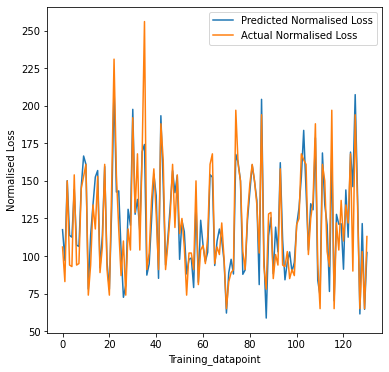

In [11]:
import numpy as np
import numpy.linalg as npl
import scipy.linalg as spl
import math
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 6]

rms = lambda x: (sum(x**2)**0.5)/(len(x)**0.5)
N = len(X_tr)
a = np.vstack(np.ones(N))
X = np.hstack((a,X_tr))
theta = npl.lstsq(X,y_tr)[0]
plt.plot(np.matmul(X,theta).transpose())
plt.xlabel('Training_datapoint')
plt.ylabel('Normalised Loss')
plt.plot(y_tr)
plt.legend(['Predicted Normalised Loss', 'Actual Normalised Loss'], loc='upper right')
rms(np.matmul(X,theta)-y_tr)

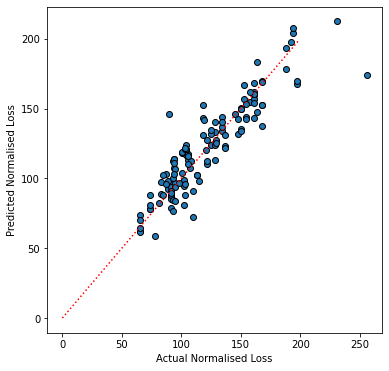

In [12]:
plt.scatter(y_tr,np.matmul(X,theta), edgecolor='k')
plt.plot(range(200),range(200),'r:')
plt.xlabel('Actual Normalised Loss')
plt.ylabel('Predicted Normalised Loss')
plt.show()


In [13]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

def loss_fn(X, Y, beta):
    return cp.norm2(X @ beta - Y)**2

def regularizer(beta):
    return cp.norm1(beta)

def objective_fn(X, Y, beta, lambd):
    return loss_fn(X, Y, beta) + lambd * regularizer(beta)

def mse(X, Y, beta):
    return (1.0 / X.shape[0]) * loss_fn(X, Y, beta).value

[-9.67354648e+00 -1.72971262e-13 -4.10287498e-14 -5.46244461e-14
 -3.85146147e-13 -2.75609623e-14  2.32833856e-14 -7.21938424e-14
 -1.42019274e-13 -1.26923762e-13 -2.14689672e-15 -3.39101233e-14
  1.74088235e-13  6.64856181e-14  4.93940856e-14  2.50581383e-14
  6.34234573e+01  2.69692957e+01 -2.40373943e+01  2.26876023e+01
 -1.48764233e+01 -1.90703535e+01 -3.79456801e+00 -5.09044189e+01
  3.55768781e+01  1.50009944e+01 -4.19280549e+00  4.01752605e+01
  0.00000000e+00  1.64215146e+01 -3.76780300e+00 -2.11500187e+01
  1.92026403e+01 -5.64383730e+01  1.40509566e+01  2.71745280e+01
  2.26959534e+01  1.85295315e+01 -7.38784592e-01  9.41031953e+00
  1.60762782e+01  1.30450098e+01  3.43266098e+00  3.65764454e-02
 -5.38661396e+00  4.65755221e+01  4.12254845e+01  1.76312550e+01
  2.29150908e+01  2.78538818e+00 -3.76780300e+00  1.70466781e+01
 -1.53851252e+01  1.25534942e+01  8.60134922e+00  3.69660288e+00
  1.40509566e+01  0.00000000e+00  3.69660290e+00 -1.37352157e+00]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


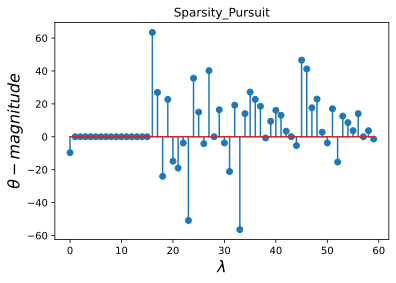

In [21]:
import cvxpy as cp

d=60 #(feature_column)
theta_cvx = cp.Variable(d);
loss = cp.norm2(X_tr*theta_cvx-y_tr);

lambd_values = np.logspace(-2, 3, 10)
train_errors = []
test_errors = []
beta_values = []
for v in lambd_values:
    lambd_values = v
    regl = lambd_values*cp.norm1(theta_cvx[1:16]);
    problem = cp.Minimize(loss+regl);
    prob = cp.Problem(problem)
    prob.solve()
    train_errors.append(mse(X_tr.astype(int), y_tr, theta_cvx))
    test_errors.append(mse(X_te, y_te, theta_cvx))
    beta_values.append(theta_cvx.value)

x = np.linspace(1,d)
print(theta_cvx.value)
plt.stem(theta_cvx.value)
plt.xlabel(r"$\lambda$", fontsize=16)
plt.ylabel(r"$\theta-magnitude$", fontsize=16)
plt.title("Sparsity_Pursuit")
plt.show()



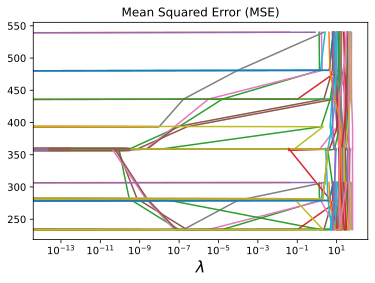

In [17]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_train_test_errors(train_errors, test_errors, beta_values):
    plt.plot(beta_values, train_errors, label="Train error")
    plt.plot(beta_values, test_errors, label="Test error")
    plt.xscale("log")
    #plt.legend(loc="upper left")
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.title("Mean Squared Error (MSE)")
    plt.show()

plot_train_test_errors(train_errors, test_errors, beta_values)
